# Thanks for Visting this notebook and Using this dataset!
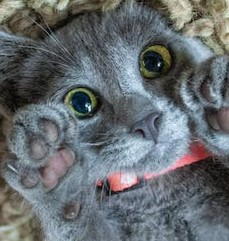
<div class="alert alert-block alert-info" style="font-size:20px; font-family:verdana;">
    In this notebook I have used basic CNNs to provide a baseline model for Pet's Facial expression recognition .Feel free to fork or edit the notebook.If you liked the notebook and Dataset, consider *upvoting* them. It helps other people discover them.
</div>

In [1]:
!pip install tensorflow keras opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached grpcio-1.63.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.2 MB/s eta 0:00:00
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-win_amd64.whl.metadata (34 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 k

In [3]:
!pip install scikit-learn pandas

  Using cached scikit_learn-1.4.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached scikit_learn-1.4.2-cp312-cp312-win_amd64.whl (10.6 MB)
Using cached pandas-2.2.2-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl (45.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)


# <div style="background-color:#fff1cc; padding: 20px;">📩 Importing The Modules</div>

In [22]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from IPython.display import display, Image
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping



# <div style="background-color:#fff1cc; padding: 20px;">📅Data Loading and Preprocessing </div>

In [23]:
# Define the path to the dataset folders
happy_folder = "Dataset/happy"
sad_folder = "Dataset/Sad"
angry_folder = "Dataset/Angry"


# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
            images.append(img)
    return images

# Load images and labels for each emotion
happy_images = load_images_from_folder(happy_folder)
sad_images = load_images_from_folder(sad_folder)
angry_images = load_images_from_folder(angry_folder)


# Create labels for each emotion category
happy_labels = [0] * len(happy_images)
sad_labels = [1] * len(sad_images)
angry_labels = [2] * len(angry_images)


# Concatenate images and labels
X = np.array(happy_images + sad_images + angry_images)
y = np.array(happy_labels + sad_labels + angry_labels)

# Normalize pixel values to range [0, 1]
X = X.astype('float32') / 255.0

# One-hot encode the labels
y = to_categorical(y, 3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <div style="background-color:#fff1cc; padding: 20px;">🧠 Training and Evaluation</div>

In [24]:


# Build the CNN model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

print(model.summary())
# Compile the model with class weights
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

c:\Users\emanu\miniconda3\envs\AnimalEmotion\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,262,595 (16.26 MB)

 Trainable params: 4,261,187 (16.26 MB)

 Non-trainable params: 1,408 (5.50 KB)

None


In [11]:

# Calculate class weights
total_samples = len(y_train)
class_weights = {0: total_samples / np.sum(y_train[:, 0]), 
                 1: total_samples / np.sum(y_train[:, 1]), 
                 2: total_samples / np.sum(y_train[:, 2])}
# Train the model with class weights
history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train, batch_size=32, epochs=100, validation_split=0.1, class_weight=class_weights,verbose=0)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
losstr, accuracytr = model.evaluate(X_train.reshape(-1, 48, 48, 1), y_train)


# Save the trained model
model.save("facial_expression_model.h5")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5488 - loss: 3.0256
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9796 - loss: 0.0805


In [26]:
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Train accuracy: {accuracytr*100:.2f}%")

Test accuracy: 58.00%
Train accuracy: 94.33%


# <div style="background-color:#fff1cc; padding: 20px;">🎵Hyperparamter tuning</div>

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import RandomizedSearchCV

# # Function to create and compile the CNN model
# def create_cnn_model(conv_filters_1=64, conv_filters_2=128, dense_units=512, dropout_rate=0.5):
#     model = Sequential()
#     model.add(Conv2D(conv_filters_1, (3, 3), activation='relu', input_shape=(48, 48, 1)))
#     model.add(Conv2D(conv_filters_1, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(dropout_rate))

#     model.add(Conv2D(conv_filters_2, (3, 3), activation='relu'))
#     model.add(Conv2D(conv_filters_2, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(dropout_rate))

#     model.add(Flatten())
#     model.add(Dense(dense_units, activation='relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(3, activation='softmax'))

#     # Compile the model with categorical_crossentropy loss
#     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#     return model

# # Create a KerasClassifier wrapper for the CNN model
# cnn_model = KerasClassifier(build_fn=create_cnn_model, epochs=10, batch_size=64, verbose=1)

# # Define the hyperparameter space to search
# param_grid = {
#     'conv_filters_1': [32, 64, 128],
#     'conv_filters_2': [64, 128, 256],
#     'dense_units': [256, 512, 1024],
#     'dropout_rate': [0.25, 0.5, 0.75]
# }

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(cnn_model, param_distributions=param_grid, n_iter=10, cv=3, verbose=1, random_state=42)

# # Fit the RandomizedSearchCV to the data
# random_search_result = random_search.fit(X_train.reshape(-1, 48, 48, 1), y_train)

# # Print the best hyperparameters found
# print("Best Parameters:", random_search_result.best_params_)

# # Retrieve the best model
# best_model = random_search_result.best_estimator_

# # Evaluate the best model on test data
# loss, accuracy = best_model.model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
# print(f"Test accuracy of the best model: {accuracy*100:.2f}%")


# <div style="background-color:#fff1cc; padding: 20px;">😻Testing the model on Pet's images</div>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Predicted Emotion: sad
Confidence [happy, sad, angry]: [2.13650419e-04 9.99679208e-01 1.07185384e-04]


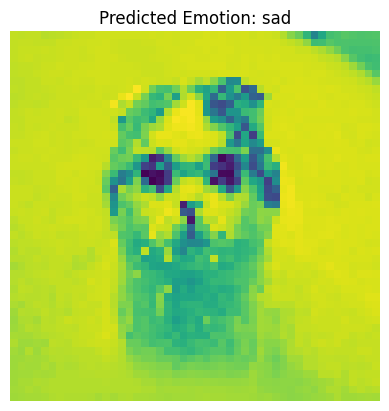

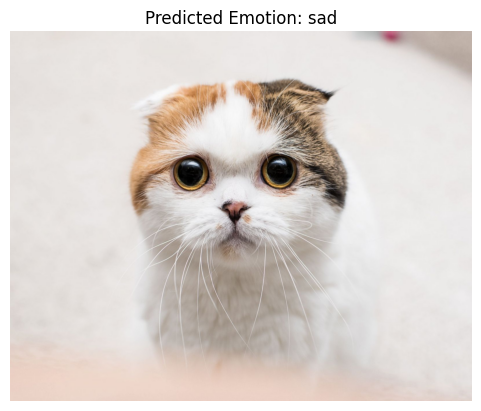

In [3]:
from keras.models import load_model
# Load the saved model
loaded_model = load_model("facial_expression_model.h5")



# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
            images.append(img)
    return images


# Load a custom test image
custom_test_image_path = "Test_img/rex_cats_01_lb_150824_5x4_1600.jpg"

custom_test_image = cv2.imread(custom_test_image_path)
custom_test_image = cv2.cvtColor(custom_test_image, cv2.COLOR_BGR2GRAY)
custom_test_image = cv2.resize(custom_test_image, (48, 48))
custom_test_image = custom_test_image.astype('float32') / 255.0

# Reshape the image to match the model input shape
custom_test_image = np.expand_dims(custom_test_image, axis=0)
custom_test_image = np.expand_dims(custom_test_image, axis=-1)

# Make predictions on the custom test image
prediction = loaded_model.predict(custom_test_image)
prediction_prob = prediction[0]

emotion_label = np.argmax(prediction[0])

# Map the predicted label to emotion class
emotion_classes = {0: 'happy', 1: 'sad', 2: 'angry'}
predicted_emotion = emotion_classes[emotion_label]

# Print the custom test image and its predicted label
print(f"Predicted Emotion: {predicted_emotion}")
print(f"Confidence [happy, sad, angry]: {prediction_prob}")

import matplotlib.pyplot as plt

#Display the custom test image using matplotlib
plt.imshow(custom_test_image[0, :, :, 0])
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')  # Hide axes
plt.show()

from PIL import Image
# Display the original custom test image using PIL
img_pil = Image.open(custom_test_image_path)
plt.imshow(np.array(img_pil))
plt.title(f"Predicted Emotion: {predicted_emotion}")
plt.axis('off')  # Hide axes
plt.show()



In [1]:
import cv2
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model('facial_expression_model.h5')

# Define a function to preprocess the frames
def preprocess_frame(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(gray, (48, 48))  # Resize to 48x48 for the model
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=-1)  # Add the channel dimension
    img = np.expand_dims(img, axis=0)  # Add the batch dimension
    return img

# Emotion classes
emotion_classes = {0: 'happy', 1: 'sad', 2: 'angry'}

# Use the default camera (index 0)
# Camera didn't work on kaggle notebook, i had to migrate to VSCode
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        img = preprocess_frame(frame)
        
        prediction = model.predict(img)
        emotion_label = np.argmax(prediction[0])
        predicted_emotion = emotion_classes[emotion_label]
        prediction_prob = prediction[0]

        # Display the result on the screen
        cv2.putText(frame, f'Emotion: {predicted_emotion}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        cv2.putText(frame, f'Confidence: {prediction_prob}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        
        cv2.imshow('Camera', frame)
        
        # Break the loop on 'ESC' key press
        if cv2.waitKey(1) & 0xFF == 27: 
            break

    cap.release()
    cv2.destroyAllWindows()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

KeyboardInterrupt: 